# Student Career Path and Decision-Making Survey

# Introduction

Our society faces a significant social problem concerning the intricate relationship between students' career choices and their overall well-being and academic performance. The path students choose after their educational journey plays a pivotal role in shaping their lives and future prospects. The decisions they make during this critical phase can either lead to success, contentment, and fulfillment or result in distress, anxiety, and academic setbacks. Unfortunately, the process of career decision-making poses numerous challenges for students, leaving many grappling with uncertainty, fear, and confusion.

In [1]:
#Load libraries
#Data processing and Data Manipulation
import pandas as pd
#Calculation & array usage
import numpy as np
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords


# Load Data

In [6]:
df = pd.read_csv("Form Responses.csv")

In [5]:
df.head()

,gender,confidence_in_career,career_decision_factors,How_did you_choose_your_career_path?,career_advice_sought,career_choice_pressure,career_alignment,doubts_about_career,confidence_in_switching_career,career_path_and_academic_failure,school_career_counseling
0,1,1,2,4,0,1,1,1,0,1,1
1,1,1,4,1,0,0,1,0,0,1,1
2,1,0,2,2,0,1,0,1,1,1,1
3,0,1,2,1,0,0,0,1,0,1,1
4,1,1,3,2,0,1,0,1,1,0,1


# Preparing Data

In [7]:
column_to_drop = ['Timestamp', 'EmailAddress']
df.drop(column_to_drop, axis=1, inplace=True)
    

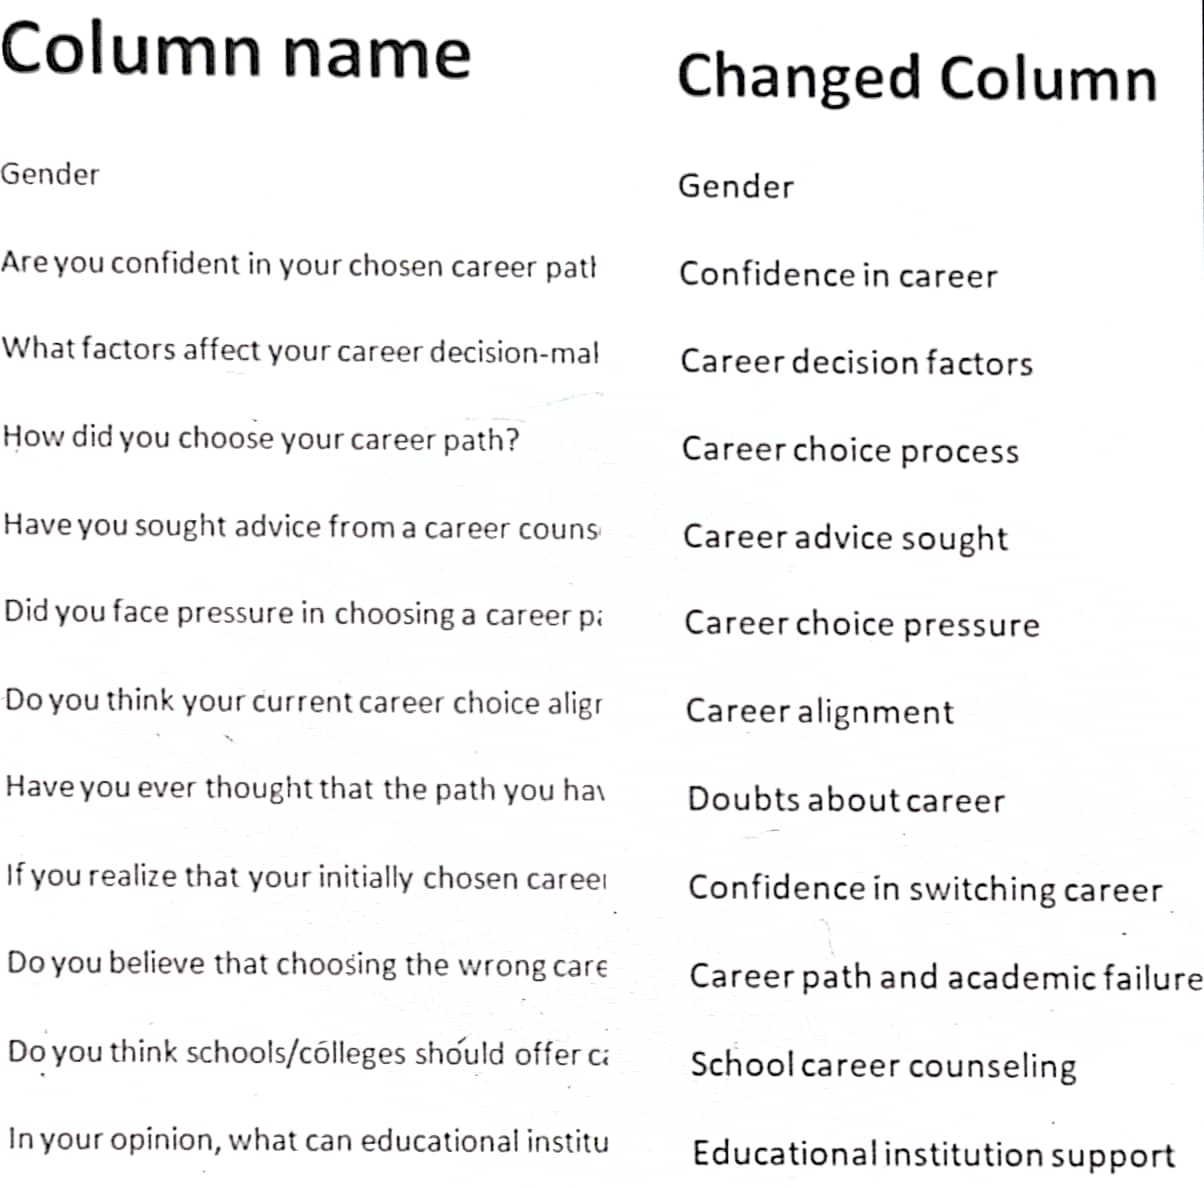

In [8]:
new_column_names = {
    'Gender':'gender',
    'Are you confident in your chosen career path?': 'confidence_in_career',
    'What factors affect your career decision-making process?': 'career_decision_factors',
    'How did you choose your career path?': 'career_choice_process',
    'Have you sought advice from a career counselor or career advisor?': 'career_advice_sought',
    'Did you face pressure in choosing a career path?': 'career_choice_pressure',
    'Do you think your current career choice aligns with your skills and strengths?': 'career_alignment',
    'Have you ever thought that the path you have chosen is not suitable for you? You could have done better if you had chosen another path.': 'doubts_about_career',
    'If you realize that your initially chosen career path is not suitable for you, are you confident in shifting to a different career path?': 'confidence_in_switching_career',
    'Do you believe that choosing the wrong career path can lead to academic failure?': 'career_path_and_academic_failure',
    'Do you think schools/colleges should offer career counseling and guidance programs?': 'school_career_counseling',
    'In your opinion, what can educational institutions do to help students choose their career paths more effectively? (Open-ended)': 'educational_institution_support'
}

df.rename(columns=new_column_names, inplace=True)


In [9]:
column_to_drop = ['educational_institution_support']
df.drop(column_to_drop, axis=1, inplace=True)


In [10]:
# Create a mapping of the values to integers
mapping = {
    'Parental expectations': 1,
    'Passion for a specific field': 2,
    'Financial stability': 3,
    'Job market trends': 4,
    'Other': 5
}

# Replace the values in the 'career_decision_factors' column with the mapped integers
df['career_decision_factors'] = df['career_decision_factors'].replace(mapping)

In [11]:
# Create a mapping of the values to the given options
mapping = {
    'Talked to friends/family': 1,
    'Based on financial stability': 2,
    'Through professional counseling': 3,
    'Based on personal interests and passion': 4,
    'Considering my educational background and qualifications': 5,
    'Other': 6
}

# Replace the values in the 'How did you choose your career path?' column with the mapped integers
df['How_did you_choose_your_career_path? '] = df['How_did you_choose_your_career_path? '].replace(mapping)

In [12]:
mapping = {
    'gender': {'Male': 1, 'Female': 0},
    'confidence_in_career': {'Yes': 1, 'No': 0},
    'career_advice_sought': {'Yes': 1, 'No': 0},
    'career_choice_pressure': {'Yes': 1, 'No': 0},
    'career_alignment': {'Yes': 1, 'No': 0},
    'doubts_about_career': {'Yes': 1, 'No': 0},
    'confidence_in_switching_career': {'Yes': 1, 'No': 0},
    'career_path_and_academic_failure': {'Yes': 1, 'No': 0},
    'school_career_counseling': {'Yes': 1, 'No': 0},
   
}

# Map the values in the specified columns using the mapping dictionary
df = df.replace(mapping)

In [13]:
df.columns

Index(['gender', 'confidence_in_career', 'career_decision_factors',
       'How_did you_choose_your_career_path? ', 'career_advice_sought',
       'career_choice_pressure', 'career_alignment', 'doubts_about_career',
       'confidence_in_switching_career', 'career_path_and_academic_failure',
       'school_career_counseling'],
      dtype='object')

In [14]:
# Define the file path for the new CSV file
file_path = "processed_data.csv"

# Save data to the new CSV file in the current directory
df.to_csv(file_path, index=False)

print("Data saved to", file_path)


Data saved to processed_data.csv
